## Parameters Initiallization

In [1]:
gamma=0.99
moves=[(1, 0), (0, -1), (-1, 0), (0, 1)]  # Down, Left, Up, Right
GridRow,GridCol=3,3
reward=-1 # akn supervisor bt3o
convergence=1e-3

## helperfunctions

In [2]:
def printGrid(grid, is_policy=False):
    for row in grid:
        line = "|"
        for value in row:
            if value == "Terminal":
                cell = value
            elif is_policy:
                cell = ["Down", "Left", "Up", "Right"][value] if isinstance(value, int) else "None"
            else:
                cell = f"{value:.2f}"
            line += f" {cell.ljust(8)} |"
        print(line)
    print()

def actionTaken(row,column,action):
    ROW,COL= moves[action]  #t8yeer elposition 3la hsab elaction (left righ up down)
    newRow=row+ROW
    newCol=column+COL
    if newRow>=0 and newRow<GridRow and newCol>=0 and newCol<GridCol:
        return newRow,newCol #kda elaction within the boundries of grid
    else:
        return row , column

In [3]:
def expectedUtility(currentRow,currentColumn,action,utility):
   # action da rkm byacess byha el list
    intended_state=actionTaken(currentRow,currentColumn,action)
    intended_utility=utility[intended_state[0]][intended_state[1]]


    deviatedLeft= (action-1)%4 # -1 % 4 --> -1  ,or 3  kdakda hygeb a5r element
    deviatedRight= (action+1)%4

    leftState= actionTaken(currentRow,currentColumn,deviatedLeft)
    leftUtility= utility[leftState[0]][leftState[1]]

    rightState= actionTaken(currentRow,currentColumn,deviatedRight)
    rightUtility= utility[rightState[0]][rightState[1]]

    expectedU=(0.8*intended_utility + 0.1*leftUtility + 0.1*rightUtility)

    return expectedU

## ValueIteration
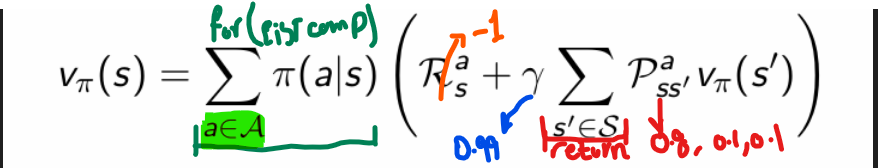

In [4]:
def valueIteration(rewards):
    utility= [[0 for _ in range(GridCol)] for _ in range(GridRow)]
    terminalStates={(0,0):rewards, (0,2):10}

    while True:
        newUtility= [row[:] for row in utility]
        maxError=0
        for x in range(GridRow):
            for y in range(GridCol):
                if(x, y) in terminalStates:
                    newUtility[x][y]= terminalStates[(x, y)] # put the value 10 & value r
                else:
                    utilities= [reward + gamma*expectedUtility(x,y,a,utility) for a in range(4)]  # make a list of all possipe actions
                    maxUtility= max(utilities) # take the maximum
                    maxError= max(maxError, abs(maxUtility- utility[x][y])) # utility is my last utility wsltlha,  
                    newUtility[x][y]=maxUtility
        utility= newUtility
        printGrid(utility)
        if maxError < convergence:
            break
    return utility

In [5]:
def get_policy(U):
    policy = [["None"]*GridCol for _ in range(GridRow)]
    terminal_states = {(0, 0), (0, 2)}
    for r in range(GridRow):
        for c in range(GridCol):
            if (r, c) in terminal_states:
                policy[r][c] = "Terminal"
            else:
                best_action = max(range(4), key=lambda a: reward + gamma*expectedUtility(r,c,a,U))
                policy[r][c] = best_action
    return policy

## Test cases :
####  Explain intuitively why the value of r leads to each policy.


we will see that if the value of r<10 , the policy will try to go  to the upper right corner (value :10)
otherwise it will  go to the value of r.
In each cell it iterate over all actions and calculate the value equation , and arg max for the best action 
,it will get 4 values for the 4 possiple actions 
 

In [6]:
U = valueIteration(100)
print("Final Utilities:")
printGrid(U)
policy = get_policy(U)
print("Optimal policy:")
printGrid(policy, True)

| 100.00   | -1.00    | 10.00    |
| -1.00    | -1.00    | -1.00    |
| -1.00    | -1.00    | -1.00    |

| 100.00   | 78.00    | 10.00    |
| 78.00    | -1.99    | 6.72     |
| -1.99    | -1.99    | -1.99    |

| 100.00   | 85.73    | 10.00    |
| 85.73    | 69.17    | 7.39     |
| 60.38    | -2.97    | 3.93     |

| 100.00   | 93.53    | 10.00    |
| 93.53    | 76.11    | 55.16    |
| 72.58    | 60.15    | 4.95     |

| 100.00   | 95.00    | 10.00    |
| 95.00    | 88.29    | 60.76    |
| 86.22    | 69.97    | 52.59    |

| 100.00   | 96.35    | 10.00    |
| 96.35    | 90.57    | 75.12    |
| 89.70    | 82.95    | 65.64    |

| 100.00   | 96.70    | 10.00    |
| 96.70    | 93.06    | 78.22    |
| 92.40    | 87.22    | 78.63    |

| 100.00   | 96.99    | 10.00    |
| 96.99    | 93.80    | 81.48    |
| 93.37    | 90.03    | 83.61    |

| 100.00   | 97.09    | 10.00    |
| 97.09    | 94.33    | 82.57    |
| 93.97    | 91.15    | 86.64    |

| 100.00   | 97.15    | 10.00    |
| 97.15    

In [7]:
U = valueIteration(3)
print("Final Utilities:")
printGrid(U)
policy = get_policy(U)
print("Optimal policy:")
printGrid(policy, True)

| 3.00     | -1.00    | 10.00    |
| -1.00    | -1.00    | -1.00    |
| -1.00    | -1.00    | -1.00    |

| 3.00     | 6.72     | 10.00    |
| 1.18     | -1.99    | 6.72     |
| -1.99    | -1.99    | -1.99    |

| 3.00     | 7.39     | 10.00    |
| 1.30     | 5.11     | 7.39     |
| -0.46    | -2.97    | 3.93     |

| 3.00     | 8.16     | 10.00    |
| 3.30     | 5.71     | 8.16     |
| -0.31    | 3.39     | 4.95     |

| 3.00     | 8.29     | 10.00    |
| 3.79     | 6.60     | 8.29     |
| 1.98     | 3.98     | 6.29     |

| 3.00     | 8.39     | 10.00    |
| 4.72     | 6.78     | 8.39     |
| 2.72     | 5.05     | 6.58     |

| 3.00     | 8.42     | 10.00    |
| 4.94     | 6.98     | 8.42     |
| 3.74     | 5.39     | 6.80     |

| 3.00     | 8.44     | 10.00    |
| 5.19     | 7.04     | 8.44     |
| 4.12     | 5.61     | 6.88     |

| 3.00     | 8.45     | 10.00    |
| 5.28     | 7.08     | 8.45     |
| 4.37     | 5.70     | 6.92     |

| 3.00     | 8.46     | 10.00    |
| 5.34     

In [8]:
U = valueIteration(0)
print("Final Utilities:")
printGrid(U)
policy = get_policy(U)
print("Optimal policy:")
printGrid(policy, True)

| 0.00     | -1.00    | 10.00    |
| -1.00    | -1.00    | -1.00    |
| -1.00    | -1.00    | -1.00    |

| 0.00     | 6.72     | 10.00    |
| -1.20    | -1.99    | 6.72     |
| -1.99    | -1.99    | -1.99    |

| 0.00     | 7.39     | 10.00    |
| -1.32    | 4.87     | 7.39     |
| -2.34    | -2.97    | 3.93     |

| 0.00     | 8.13     | 10.00    |
| 2.63     | 5.45     | 8.13     |
| -2.57    | 3.01     | 4.95     |

| 0.00     | 8.27     | 10.00    |
| 3.06     | 6.55     | 8.27     |
| 1.39     | 3.76     | 6.23     |

| 0.00     | 8.39     | 10.00    |
| 4.32     | 6.74     | 8.39     |
| 2.42     | 4.95     | 6.53     |

| 0.00     | 8.42     | 10.00    |
| 4.57     | 6.96     | 8.42     |
| 3.59     | 5.33     | 6.78     |

| 0.00     | 8.44     | 10.00    |
| 4.87     | 7.03     | 8.44     |
| 4.03     | 5.59     | 6.87     |

| 0.00     | 8.45     | 10.00    |
| 4.96     | 7.08     | 8.45     |
| 4.31     | 5.69     | 6.92     |

| 0.00     | 8.46     | 10.00    |
| 5.03     

In [9]:
U = valueIteration(-3)
print("Final Utilities:")
printGrid(U)
policy = get_policy(U)
print("Optimal policy:")
printGrid(policy, True)

| -3.00    | -1.00    | 10.00    |
| -1.00    | -1.00    | -1.00    |
| -1.00    | -1.00    | -1.00    |

| -3.00    | 6.72     | 10.00    |
| -1.99    | -1.99    | 6.72     |
| -1.99    | -1.99    | -1.99    |

| -3.00    | 7.39     | 10.00    |
| -2.97    | 4.79     | 7.39     |
| -2.97    | -2.97    | 3.93     |

| -3.00    | 8.13     | 10.00    |
| 2.20     | 5.29     | 8.13     |
| -3.94    | 2.89     | 4.95     |

| -3.00    | 8.25     | 10.00    |
| 2.50     | 6.53     | 8.25     |
| 1.12     | 3.73     | 6.21     |

| -3.00    | 8.38     | 10.00    |
| 3.98     | 6.72     | 8.38     |
| 2.31     | 4.93     | 6.52     |

| -3.00    | 8.41     | 10.00    |
| 4.25     | 6.96     | 8.41     |
| 3.53     | 5.31     | 6.77     |

| -3.00    | 8.44     | 10.00    |
| 4.56     | 7.02     | 8.44     |
| 3.98     | 5.58     | 6.86     |

| -3.00    | 8.45     | 10.00    |
| 4.66     | 7.07     | 8.45     |
| 4.26     | 5.68     | 6.92     |

| -3.00    | 8.46     | 10.00    |
| 4.73     